# Chapter 3: Introduction to NumPy



In [1]:
import numpy as np
np.__version__

'1.9.2'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

## Understanding Data Types in Python

Users of Python are often drawn-in by its ease of use, one piece of which is dynamic
typing. While a statically-typed language like C or Java requires each variable to be
explicitly declared, a dynamically-typed language like Python skips this specification.

For example, in C you might specify a particular operation as follows:

``` c
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:

``` python
# Python code
result = 0
for i in range(100):
    result += i
```

Notice the main difference: in C, the data types of each variable are explicitly
declared, while in Python the types are dynamically inferred. This difference certainly
contributes to the ease Python provides for translating algorithms to code, but to
really understand data in Python we must first understand what is happening under
the hood.

As we have mentioned several times, Python variables are dynamically typed. This
means, for example, that we can assign any kind of data to any variable:

``` python
# Python code
x = 4
x = "four"
```

Here we’ve switched the contents of x from an integer to a string.
The same thing in C would lead (depending on compiler settings) to a compilation
error or other unintented consequences:

``` c
/* C code */
int x = 4;
x = "four"; // FAILS
```

This sort of flexibility is one piece that makes Python and other dynamically-typed
languages convenient and easy to use. Understanding how this works is an important
piece of learning to analyze data efficiently and effectively with Python. But what this
type-flexibility also points to is the fact that Python variables are more than just their
value; they also contain extra information about the type of the value.

### A Python Integer is More than just an Integer

The standard Python implementation is written in C. This means that every Python
object is simply a cleverly-disguised C structure, which contains not only its value,
but other information as well.

For example, when we define an integer in Python,

``` python
x = 10000
```

x is not just a “raw” integer. It’s actually a pointer to a compound C structure, which
contains several values Looking through the Python 3.4 source code, we find that the
long integer type definition effectively looks like this (once the C macros are expanded):

``` c
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3.4 actually contains four pieces:

- ob_refcnt, a reference count which helps Python silently handle memory allocation and deallocation
- ob_type, which encodes the type of the variable
- ob_size, which specifies the size of the following data members
- ob_digit, which contains the actual integer value that we expect the Python variable to represent.

This means that there is some overhead in storing an integer in Python as compared
to an integer in a compiled language like C.

A C integer is essentially a label for a position in memory
whose bytes encode an integer value. A Python integer is a pointer to a position in
memory containing all the Python object information, including the bytes which
contain the integer value. This extra information in the Python integer structure is
what allows Python to be coded so freely and dynamically. All this additional information in Python types comes at a cost, however, which becomes especially apparent
in structures which combine many of these objects.

### A Python List is More than just a List

In [4]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

This flexibility comes at a cost: to allow these flexible types, each item in the list
must contain its own type info, reference count, and other information; that is, each
item is a complete Python object. In the special case that all variables are of the same
type, much of this information is redundant: it can be much more efficient to store
data in a fixed-type array.

At the implementation level, the array essentially contains a single pointer to one contiguous
block of data. The Python list, on the other hand, contains a pointer to a
block of pointers, each of which in turn points to a full Python object like the Python
integer we saw above. Again, the advantage of the list is flexibility: because each list
element is a full structure containing both data and type information, the list can be
filled with data of any desired type. Fixed-type NumPy-style arrays lack this flexibility,
but are much more efficient for storing and manipulating data.

### Fixed-type arrays in Python

Python offers several different options for storing data in efficient, fixed-type data
buffers. Built-in since Python 3.3 is the array module, which can be used to create
dense arrays of a uniform type:

In [5]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here "i" is a type code indicating the contents are integers. Much more useful, however,
is the ndarray object of the NumPy package. While Python’s array obnject provides
efficient storage of array-based data, NumPy adds to this efficient operations on
that data. We will explore these operations in later sections; here we’ll demonstrate
several ways of creating a numpy array.

## Creating Arrays from Python Lists

In [6]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [7]:
np.array([3.14, 2, 2, 3])

array([ 3.14,  2.  ,  2.  ,  3.  ])

In [8]:
np.array([1, 2, 3, 4], dtype='float32')

array([ 1.,  2.,  3.,  4.], dtype=float32)

In [8]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### Creating arrays from scratch

In [9]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=np.int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Create a (3 x 5) floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [11]:
# Crate a (3 x 5) array filled with 3.14
np.full((3, 5), 1)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [12]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [13]:
# Create an array of 5 values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [16]:
# Create a (3 x 3) array of uniformly-distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[ 0.20496577,  0.01323817,  0.8575594 ],
       [ 0.36724662,  0.58149074,  0.27530953],
       [ 0.83828737,  0.33755517,  0.25718841]])

In [17]:
# Create a (3 x 3) array of normally-distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-1.00083642,  1.53141655,  1.39328602],
       [ 1.26287136,  1.0006668 ,  0.57999775],
       [ 0.09075493,  0.09692961,  1.87509015]])

In [19]:
# Create a (3 x 3) array of random integers in the interval
# [0, 10)
np.random.randint(0, 10, (3, 3))

array([[9, 0, 4],
       [3, 6, 3],
       [3, 3, 3]])

In [21]:
# Identity matrix
np.eye(6)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [24]:
# Create an uninitialized array of 3 integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([ 0.,  0.,  0.])

### NumPy Standard Data Types

Because NumPy arrays contain values of a single type, it is important to have detailed knowledge of those types and their limitations. Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard numpy data types are listed [here](http://docs.scipy.org/doc/numpy/user/basics.types.html). Note that when constructing an array, they can be specified using a string, e.g.

``` python
np.zeros(10, dtype='int16')
```

or using the associated numpy object, e.g.

``` python
np.zeros(10, dtype=np.int16)
```


## The Basics of NumPy Arrays

### NumPy Array Attributes

In [25]:
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # 1D array
x2 = np.random.randint(10, size=(3, 4)) # 2D array
x3 = np.random.randint(10, size=(3, 4, 5)) # 3D array

Each array has attributes ndim (giving the number of dimensions), shape (giving thesize of each dimension), and size (giving the total size of the array):

In [26]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

('x3 ndim: ', 3)
('x3 shape:', (3, 4, 5))
('x3 size: ', 60)


In [27]:
print("dtype:", x3.dtype)

('dtype:', dtype('int64'))


In [28]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

('itemsize:', 8, 'bytes')
('nbytes:', 480, 'bytes')


### Array Indexing: Accessing Single Elements

Just like Python lists!

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [29]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [31]:
x2[2, 0]

1

In [32]:
x2[2, -1]

7

Values can also be modified using any of the above index notation:

In [33]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Unlike Python lists, though, keep in mind that NumPy arrays have a fixed type! This means, for example, that if you attempt to insert a floating point value to an integer array, the value will be silently truncated. Don’t be caught unaware by this behavior!

In [35]:
x1[0] = 3.6 # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

### Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon ( : ) character.

The NumPy slicing syntax follows that of the standard Python list: to access a slice of an array x , use 

```
x[start:stop:step]
```

If any of these are unspecified, they default to the values start=0 , stop= (size of dimension), step=1 .

In [36]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
x[::2] # every other element

array([0, 2, 4, 6, 8])

In [38]:
x[1::2] # every other element, starting at index 1

array([1, 3, 5, 7, 9])

In [40]:
x[::-2] # all elements, reversed

array([9, 7, 5, 3, 1])

In [41]:
x[5::-2] # reversed every other from index 5

array([5, 3, 1])

In [42]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [49]:
x2[:2, :3] # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [51]:
x2[:, ::2] # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

In [54]:
x2[::-1, ::-1] # subarray dimension reversed together

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

#### Accessing Array Rows and Columns

This can be done ccombining indexing and slicing, using an empty slice marked by a single colon ```( : )```:

In [58]:
print(x2[:, 0]) # first column
print(x2[0, :]) # first row
print(x2[0]) # equivalent to x2[0, :]

[12  7  1]
[12  5  2  4]
[12  5  2  4]


#### Subarrays as no-copy views

One important – and extremely useful – thing to know about array slices is that they return views rather than copies of the array data. (If you’re familiar with Python lists, keep in mind that this is different behavior: In lists, slices are copies by default) 

Consider our two-dimensional array from above:

In [59]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [60]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


In [61]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [62]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


This is actually an extremely useful default behavior: it means that when we work with large datasets, we can access and process pieces of these datasets without copying the underlying data buffer. This works because NumPy arrays have a very flexible internal representation

#### Creating Copies of Arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the copy() method:

In [63]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


### Reshaping of Arrays

Another useful type of operation is reshaping of arrays. The most flexible way of doing this is with the reshape method. For example, if you want to put the numbers 1 through 9 in a 3x3 grid, you can do the following:

In [66]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Another common reshaping pattern is the conversion of a 1D array into a 2D row or column matrix. This can be done with the reshape method, or more easily done by making use of the ```newaxis``` keyword within a slice operation:

In [79]:
x = np.array([1, 2, 3])
# row vector via reshape
x.reshape((1, 3))


# row vector via newaxis
x[np.newaxis, :]


# column vector via reshape
x.reshape((3, 1))


# column vector via newaxis
x[:, np.newaxis]

array([[[99,  5,  2,  4]],

       [[ 7,  6,  8,  8]],

       [[ 1,  6,  7,  7]]])

In [77]:
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

### Array Concatenation and Splitting

#### Concatenation of Arrays

In [73]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [74]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [75]:
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [76]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [80]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

In [82]:
np.concatenate([x, grid])

ValueError: all the input arrays must have same number of dimensions

In [83]:
# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [86]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, ```np.dstack``` will stack three-dimensional arrays along the third axis.

#### Splitting of Arrays

In [93]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [15, 20]) # split at indexes 3 and 5
print(x1, x2, x3)

(array([ 1,  2,  3, 99, 99,  3,  2,  1]), array([], dtype=int64), array([], dtype=int64))


In [94]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [95]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [96]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## Random Number Generation

### Understanding a Simple “Random” Sequence

While it is possible to obtain sequences of truly random numbers through physical means (by, e.g. monitoring decay events of a radioactive substance) most algorithmic random number generators used in practice are simple deterministic algorithms designed to produce a sequence of pseudo-random numbers with suitable properties.

The simplest of these are linear congruential generators, which generate a sequence of integers r i using the following recursive form:

r<sub>i + 1</sub> = (ar<sub>i</sub>) + c MOD m

where a, c, and m are chosen such that the resulting numbers have useful properties. For example, we can follow Knuth and Lewis who suggest generating 32-bit uniform deviates using m = 2<sup>32</sup> , a = 1664525, and c = 1013904223. We can implement this step simply in Python:

In [97]:
def LCG_next(r, a=1664525, c=1013904223, m=2 ** 32):
    """
    Generate the next pseudorandom number
    using a Linear Congruential Generator
    """
    return (a * r + c) % m

In [98]:
seed = 0
for i in range(5):
    seed = LCG_next(seed)
    print(seed)

1013904223
1196435762
3519870697
2868466484
1649599747


Often, rather than creating a sequence of integers, it is more convenient to create a sequence of uniform deviates: that is, numbers distributed uniformly in the half-open interval [0, 1). Here we’ll implement this by making use of Python’s convenient generator syntax. We’ll also add code which will automatically seed the sequence based on the current microseconds in the system clock.

In [99]:
from datetime import datetime
from itertools import islice

In [109]:
def LCG_generator(seed=None, a=1664525, c=1013904223, m=2 ** 32):
    """
    Linear Congruential generator of pseudorandom numbers
    """
    if seed is None:
        # If seed is not provided, use current microseconds
        seed = datetime.now().microsecond
        
    while True:
        seed = LCG_next(seed, a=a, c=c, m=m)
        yield float(seed) / m

In [110]:
def simple_uniform_deviate(N, seed=None):
    """
    return a list of N pseudorandom numbers
    in the interval [0, 1)
    """
    gen = LCG_generator(seed)
    return list(islice(gen, N))

In [111]:
# Print a list of 5 random numbers
simple_uniform_deviate(10)

[0.12163368775509298,
 0.5501785189844668,
 0.13538059243001044,
 0.6166825359687209,
 0.734251308022067,
 0.8945534038357437,
 0.7405876640696079,
 0.9176034368574619,
 0.09680313966237009,
 0.4821144794113934]

We’ve started with a seed value, which defaults to some changing
value or other source of pseudo-randomness available in the operating system. Fromt his seed, we construct an algorithm which creates a deterministic sequence of values which are sufficiently random for our purposes. All pseudorandom number generators share this determinism.

Below we’ll see some more efficient and sophisticated random number generators built-in to Python and to NumPy. Despite their complexity, under the hood they are just deterministic algorithms which step from one seed to the next, albeit with more involved steps than we used above.

### Efficient Random Numbers: ```numpy.random```

Python has a built-in random module which uses the sophisticated Mersenne Twister algorithm to generate sequences of uniform pseudorandom numbers.

``` python
import random
[random.random() for i in range(5)]
```

The ```numpy.random``` submodule, like Python’s built-in random module, is based on the Mersenne Twister algorithm. Unlike the Python’s built-in tools, it is optimized for generating large arrays of random numbers.

#### Uniform Deviates
The basic interface is the rand function, which generates uniform deviates:

In [112]:
np.random.rand()

0.6527903170054908

In [113]:
np.random.rand(5)

array([ 0.63505887,  0.99529957,  0.58185033,  0.41436859,  0.4746975 ])

In [114]:
np.random.rand(3, 3)

array([[ 0.6235101 ,  0.33800761,  0.67475232],
       [ 0.31720174,  0.77834548,  0.94957105],
       [ 0.66252687,  0.01357164,  0.6228461 ]])

#### Random Integers

In [115]:
# 10 random integers in the interval [0, 10)
np.random.randint(0, 10, size=10)

array([4, 2, 0, 3, 2, 0, 7, 5, 9, 0])

Note that here the upper bound is exclusive: that is, the value 10 will never appear in the above list. A related function is np.random.random_integers , which instead implements an inclusive upper bound:

In [117]:
# 10 random integers in the interval [0, 10]
np.random.random_integers(0, 10, size=10)

array([ 3,  4,  1,  2,  9, 10,  1,  4, 10,  6])

#### Permutations and Selections

In [136]:
x = np.arange(10)
print x
print np.random.permutation(x)
print x

[0 1 2 3 4 5 6 7 8 9]
[9 5 1 6 2 8 4 7 3 0]
[0 1 2 3 4 5 6 7 8 9]


In [127]:
np.random.choice(x, 10, replace=False)

array([1, 2, 4, 8, 9, 0, 3, 7, 5, 6])

In [133]:
np.random.choice(x, 10, replace=True)

array([7, 5, 1, 2, 2, 8, 1, 5, 8, 4])

Neither of these functions modify the original array; if we’d like to shuffle the array in-place we can use the ```np.random.shuffle``` function:

In [137]:
print(x)
np.random.shuffle(x)
print(x)

[0 1 2 3 4 5 6 7 8 9]
[6 0 3 7 8 4 5 9 2 1]


#### Normally-distributed Values

While uniform deviates and collections of integers are useful, there are many other distribution functions that are useful in practice. Perhaps the best-known is the normal distribution.

In [140]:
# Sequence of normally-distributed values
np.random.randn(10)

array([-0.70068976, -1.7683479 ,  0.34041728,  0.72924169, -1.08835382,
       -2.87777873, -0.66147769,  0.70592839, -0.35859784,  0.73198245])

In [142]:
# mean=10, stdev=2, size=(3, 3)
np.random.normal(10, 2, (3, 3))

array([[ 11.51786431,   7.62816164,  11.85879887],
       [ 11.09390405,   8.26081532,  12.44685583],
       [  9.73513928,   8.99020758,   9.11048439]])

#### Other Distributions

In [143]:
# poisson distribution for lambda=5
np.random.poisson(5, size=10)

array([2, 5, 3, 1, 8, 8, 6, 4, 6, 7])

In [144]:
# exponential distribution with scale=1
np.random.exponential(1, size=10)

array([ 0.7624237 ,  0.36324222,  2.14438546,  0.28851271,  1.13137878,
        1.66296576,  0.56589455,  1.3948691 ,  1.76961986,  0.47647858])

### Simultaneously Using Multiple Chains

Sometimes it is useful to have multiple random number sequences available concur‐
rently; numpy.random provides the RandomState class for this purpose. Under the
hood, the above functions are simply making use of a single global instance of this
class. It can be instantiated and used as follows:

In [145]:
# instantiate a random number generator
# if seed is not specified, it will be seeded
# with a system-dependent source of randomness
rng = np.random.RandomState(seed=2)

Once this class instance is created, many of the above functions can be used as a
method of the class. For example:

In [146]:
rng.rand(3, 3)

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467]])

In [147]:
rng.randint(0, 10, size=5)

array([4, 4, 5, 7, 3])

In [148]:
rng.randn(3, 3)

array([[ 2.6460672 , -0.04386375, -0.96561968],
       [ 0.87866389, -2.24587483,  1.11957525],
       [-1.054368  , -1.0088915 , -0.06752199]])

## Computation on NumPy Arrays: Universal Functions

### The Slowness of Loops

In [149]:
def compute_reciporicals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1 / values[i]
    return output

In [150]:
values = np.random.randint(1, 10, size=5)
compute_reciporicals(values)

array([ 0.,  0.,  1.,  0.,  0.])

In [151]:
big_array = np.random.randint(1, 100, size=1E6)
%timeit compute_reciporicals(big_array)

1 loops, best of 3: 471 ms per loop


Each time the
reciporical is computed, Python first examines the object’s type and does a dynamic
lookup of the correct function to use for that type. If we were working in compiled
code instead, this type specification would be known before the code executes and the
result could be computed much more efficiently.

### Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this
kind of statically-typed, compiled routine. This is known as a vectorized operation.
This can be accomplished by simply performing an operation on the array, which will
then be applied to each element. The loop over each operation can then be pushed
into the compiled layer of numpy, leading to much faster execution.
Compare the results of the following two:

In [156]:
print(compute_reciporicals(values))
print(1 / values)

[ 0.  0.  1.  0.  0.]
[0 0 1 0 0]


In [153]:
%timeit (1 / big_array)

100 loops, best of 3: 13.5 ms per loop


This vectorized operation is known as a ufunc in NumPy, short for “Universal Function”.
The main purpose of ufuncs is to quickly execute repeated operations by pushing
the loops down into fast compiled code. They are extremely flexible: above we
saw an operation between a scalar and an array; we can also operate between two
arrays:

In [157]:
np.arange(5) / np.arange(1, 6)

array([0, 0, 0, 0, 0])

In [159]:
x = np.arange(9).reshape((3, 3))
print x
2 ** x

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Vectorized operations such as ufuncs are nearly always more efficient than their
counterpart implemented using Python loops. Any time you see such a loop in a
Python script, you should consider whether it can be replaced with a vectorized
expression.

### Exploring NumPy’s UFuncs

Ufuncs exist in two flavors: unary ufuncs, which operate on a single input, and binary
ufuncs, which operate on two inputs. We’ll see examples of both these types of functions
below.

#### Array Arithmetic

In [162]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2.)
print("x // 2 =", x // 2)
print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

('x =', array([0, 1, 2, 3]))
('x + 5 =', array([5, 6, 7, 8]))
('x - 5 =', array([-5, -4, -3, -2]))
('x * 2 =', array([0, 2, 4, 6]))
('x / 2 =', array([ 0. ,  0.5,  1. ,  1.5]))
('x // 2 =', array([0, 0, 1, 1]))
('-x = ', array([ 0, -1, -2, -3]))
('x ** 2 = ', array([0, 1, 4, 9]))
('x % 2 = ', array([0, 1, 0, 1]))


In [163]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific
functions built-in to NumPy; for example, the + operator is simply a wrapper for the
add function:

In [164]:
np.add(x, 2)

array([2, 3, 4, 5])

#### Absolute value

In [165]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [169]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
print np.abs(x)

[ 5.  5.  2.  1.]
[ 5.  5.  2.  1.]


#### Trigonometric Functions
NumPy provides a large number of useful ufuncs, and some of the most useful for the
data scientist are the trigonometric functions We’ll start by defining an array of
angles:

In [171]:
theta = np.linspace(0, np.pi, 3)
print theta

[ 0.          1.57079633  3.14159265]


In [172]:
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

('theta = ', array([ 0.        ,  1.57079633,  3.14159265]))
('sin(theta) = ', array([  0.00000000e+00,   1.00000000e+00,   1.22464680e-16]))
('cos(theta) = ', array([  1.00000000e+00,   6.12323400e-17,  -1.00000000e+00]))
('tan(theta) = ', array([  0.00000000e+00,   1.63312394e+16,  -1.22464680e-16]))


The values are computed to within machine precision, which is why we values which
should be zero do not always hit exactly zero.

#### Exponents and Logarithms

In [173]:
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))

('x =', [1, 2, 3])
('e^x =', array([  2.71828183,   7.3890561 ,  20.08553692]))
('2^x =', array([ 2.,  4.,  8.]))


In [174]:
print("3^x =", np.power(3, x))

('3^x =', array([ 3,  9, 27]))


In [175]:
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

('x =', [1, 2, 4, 10])
('ln(x) =', array([ 0.        ,  0.69314718,  1.38629436,  2.30258509]))
('log2(x) =', array([ 0.        ,  1.        ,  2.        ,  3.32192809]))
('log10(x) =', array([ 0.        ,  0.30103   ,  0.60205999,  1.        ]))


In [176]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

('exp(x) - 1 =', array([ 0.        ,  0.0010005 ,  0.01005017,  0.10517092]))
('log(1 + x) =', array([ 0.        ,  0.0009995 ,  0.00995033,  0.09531018]))


#### Specialized Ufuncs

NumPy has many more ufuncs available including hyperbolic trig functions, bitwise
arithmetic, comparison operators, conversions from radians to degrees, rounding and
remainders, and much more. A look through the numpy documentation can reveal
many interesting functionality.
Another excellent source for more specialized and obscure ufuncs is the scipy.spe
cial submodule. There are far too many functions here to list them all, but we’ll go
over some highlights:

In [177]:
from scipy import special

In [178]:
# Bessel functions:
x = [0, 1, 2]
print("J0(x) =", special.j0(x))
print("J1(x) =", special.j1(x))
print("J4(x) =", special.jn(x, 4))

('J0(x) =', array([ 1.        ,  0.76519769,  0.22389078]))
('J1(x) =', array([ 0.        ,  0.44005059,  0.57672481]))
('J4(x) =', array([-0.39714981, -0.06604333,  0.36412815]))


In [179]:
# Gamma functions (generalized factorials) & related functions
x = [1, 5, 10]
print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))

('gamma(x) =', array([  1.00000000e+00,   2.40000000e+01,   3.62880000e+05]))
('ln|gamma(x)| =', array([  0.        ,   3.17805383,  12.80182748]))
('beta(x, 2) =', array([ 0.5       ,  0.03333333,  0.00909091]))


In [180]:
# Error function (Integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x) =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

('erf(x) =', array([ 0.        ,  0.32862676,  0.67780119,  0.84270079]))
('erfc(x) =', array([ 1.        ,  0.67137324,  0.32219881,  0.15729921]))
('erfinv(x) =', array([ 0.        ,  0.27246271,  0.73286908,         inf]))


### Advanced Ufunc Features
Ufuncs are very flexible beasts; they implement several interesting and useful features,
which we’ll quickly demonstrate below.
#### Specifying Output
For large calculations, it is sometimes useful to be able to specify the array where the
result of the calculation will be stored. Rather than creating a temporary array, this
can be used to write computation results directly to the memory location where you’d
like them to be. For all ufuncs, this can be done using the out argument of the function:

In [182]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[  0.  10.  20.  30.  40.]


In [183]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


If we had instead written y[::2] = ```2 ** x```, this would have resulted in the creation
of a temporary array to hold the results of ```2 ** x```, followed by a second operation
copying those values into the y array. This doesn’t make much of a difference for such
a small computation, but for very large arrays the memory savings from careful use of
the out argument can be significant.

#### Aggregates
For binary ufuncs, there are some interesting aggregates that can be computed from
Ufuncs. For example, if we’d like to reduce an array with a particular operation, we
can use the reduce method of any ufunc. A reduce repeatedly applies a given operation
to the elements of an array until only a single result is left.
For example, calling reduce on the add ufunc returns the sum of all elements in the
array:

In [188]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [185]:
np.multiply.reduce(x)

120

In [186]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [189]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

#### Outer Products
Finally, any ufunc can compute the output of all pairs of two different inputs using
the outer method. This allows you, in one line, to do things like create a multiplication
table:

In [191]:
x = np.arange(1, 13)
print x 
print np.multiply.outer(x, x)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[  1   2   3   4   5   6   7   8   9  10  11  12]
 [  2   4   6   8  10  12  14  16  18  20  22  24]
 [  3   6   9  12  15  18  21  24  27  30  33  36]
 [  4   8  12  16  20  24  28  32  36  40  44  48]
 [  5  10  15  20  25  30  35  40  45  50  55  60]
 [  6  12  18  24  30  36  42  48  54  60  66  72]
 [  7  14  21  28  35  42  49  56  63  70  77  84]
 [  8  16  24  32  40  48  56  64  72  80  88  96]
 [  9  18  27  36  45  54  63  72  81  90  99 108]
 [ 10  20  30  40  50  60  70  80  90 100 110 120]
 [ 11  22  33  44  55  66  77  88  99 110 121 132]
 [ 12  24  36  48  60  72  84  96 108 120 132 144]]


## Aggregations: Min, Max, and Everything In Between

### Examples of NumPy Aggregates
Here we’ll give a few examples of NumPy’s aggregates
####Summing the Values in an Array
As a quick example, consider computing the sum of all values in an array. Python
itself can do this using the built-in sum function

In [195]:
L = np.random.random(50)
x = np.arange(1, 13)
sum(x)

78

In [196]:
np.sum(L)

27.746538534281942

In [197]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 158 ms per loop
1000 loops, best of 3: 710 µs per loop


#### Minimum and Maximum

In [198]:
min(big_array), max(big_array)

(7.0712031718933588e-07, 0.99999972076563337)

In [199]:
np.min(big_array), np.max(big_array)

(7.0712031718933588e-07, 0.99999972076563337)

In [200]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 81.7 ms per loop
1000 loops, best of 3: 431 µs per loop


#### Multi-dimensional Aggregates

In [201]:
M = np.random.random((3, 4))
print(M)

[[ 0.01894402  0.25765372  0.56332389  0.20046614]
 [ 0.48722832  0.07304061  0.31661609  0.84568606]
 [ 0.92470011  0.10747094  0.74250228  0.26790177]]


In [202]:
M.sum()

4.8055339396906955

In [203]:
M.min(axis=0)

array([ 0.01894402,  0.07304061,  0.31661609,  0.20046614])

In [204]:
M.max(axis=1)

array([ 0.56332389,  0.84568606,  0.92470011])

## Computation on Arrays: Broadcasting
### Introducing Broadcasting
Recall that for arrays of the same size, binary operations are performed on an
element-by-element basis:

In [206]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 4])
a + b

array([5, 6, 6])

Broadcasting allows these types of binary operations to be performed on arrays of different
size: for example, we can just as easily add a scalar (think of it as a zerodimensional
array) to an array:

In [207]:
a + 5

array([5, 6, 7])

We can similarly extend this to arrays of higher dimension. Observe the result when
we add a one-dimensional array to a two-dimensinoal array:

In [208]:
M = np.ones((3, 3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [209]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [212]:
a = np.arange(4)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2 3]
[[0]
 [1]
 [2]]


In [213]:
a + b

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

Just as above we stretched or broadcasted one value to match the shape of the other,
here we’ve stretched both a and b to match a common shape, and the result is a twodimensional
array!

###Broadcasting in Practice
Broadcasting operation form the core of many examples we’ll see throughout this
book; here are a couple simple examples of where they can be useful:
####Centering an Array
In the previous section we saw that ufuncs allow a NumPy user to remove the need to
explicitly write slow Python loops. Broadcasting extends this ability. One commonlyseen
example is when centering an array of data. Imagine you have an array of ten
observations, each of which consists of three values. Using the standard convention,
we’ll store this in a 10 × 3 array:

In [215]:
X = np.random.random((10, 3))
print X

[[ 0.990256    0.8273205   0.73525403]
 [ 0.87470143  0.12921332  0.53780679]
 [ 0.62713985  0.14917748  0.39123426]
 [ 0.52353407  0.24066459  0.57074803]
 [ 0.90877922  0.92873566  0.91263925]
 [ 0.96918281  0.64789794  0.35392946]
 [ 0.73012066  0.72134695  0.25901513]
 [ 0.55512443  0.8095438   0.64113992]
 [ 0.5239869   0.87262033  0.42315949]
 [ 0.12326567  0.75850034  0.45814112]]


We can compute the mean using the mean aggregate across the first dimension:

In [218]:
Xmean = X.mean(0)
Xmean

array([ 0.6826091 ,  0.60850209,  0.52830675])

And now we can center the X array by subtracting the mean (this is a broadcasting
operation):

In [219]:
X_centered = X - Xmean

To double-check that we’ve done this correctly, we can check that the centered array
has near zero mean:

In [221]:
X_centered.mean(0)
print X_centered

[[ 0.30764689  0.21881841  0.20694728]
 [ 0.19209233 -0.47928877  0.00950004]
 [-0.05546925 -0.45932461 -0.13707249]
 [-0.15907504 -0.3678375   0.04244129]
 [ 0.22617012  0.32023357  0.3843325 ]
 [ 0.28657371  0.03939585 -0.17437729]
 [ 0.04751155  0.11284486 -0.26929162]
 [-0.12748468  0.20104171  0.11283317]
 [-0.1586222   0.26411824 -0.10514726]
 [-0.55934343  0.14999824 -0.07016563]]


#### Plotting a 2D function

In [222]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

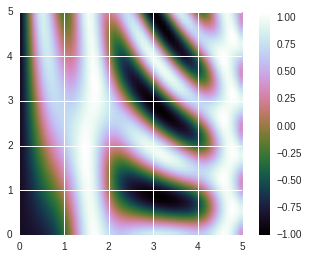

In [225]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap=plt.cm.cubehelix)
plt.colorbar();

### Utility Routines for Broadcasting
np.broadcast and np.broadcast_arrays are utility routines which can help with
broadcasting.
np.broadcast will create a broadcast object which gives the shape of the broadcasted
arrays, and allows iteration through all broadcasted sets of elements:

In [226]:
x= [['A'],
    ['B']]
y = [[1, 2, 3]]
xy = np.broadcast(x, y)
xy.shape

(2, 3)

In [227]:
for xi, yi in xy:
    print(xi, yi)

('A', 1)
('A', 2)
('A', 3)
('B', 1)
('B', 2)
('B', 3)


np.broadcast_arrays takes input arrays and returns array views with the resulting
shape and structure:

In [228]:
xB, yB = np.broadcast_arrays(x, y)
print(xB)
print(yB)

[['A' 'A' 'A']
 ['B' 'B' 'B']]
[[1 2 3]
 [1 2 3]]


## Comparisons, Masks, and Boolean Logic
This section covers the use of Boolean masks to examine and manipulate values
within NumPy arrays. Masking comes up when you want to extract, modify, count, or
otherwise manipulate values in an array based on some criterion: for example, you
might wish to count all values greater than a certain value, or perhaps remove all outliers
which are above some threshold. In NumPy, boolean masking is often the most
efficient way to accomplish these types of tasks.
### Comparison Operators as ufuncs
In section X.X we introduced NumPy’s Universal Functions (ufuncs), and focused in
particular on arithmetic operators. We saw that using +, -, *, /, and others on arrays
leads to elementwise operations. For example, adding a number to an array adds that
number to every element:

In [229]:
x = np.array([1, 2, 3, 4, 5])
x + 10

array([11, 12, 13, 14, 15])

NumPy also implements comparison operators such as < (less than) and > (greater
than) as elementwise ufuncs. The result of these comparison operators is always an
array with a boolean data type. All six of the standard comparison operations are
available:

In [230]:
x < 3 # less than

array([ True,  True, False, False, False], dtype=bool)

In [231]:
x != 3 # not equal

array([ True,  True, False,  True,  True], dtype=bool)

It is also possible to compare two arrays element-by-element, and to include compound
expressions:

In [232]:
2 * x == x ** 2

array([False,  True, False, False, False], dtype=bool)

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and
shape. Here is a two-dimensional example:

In [233]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [234]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

### Working with Boolean Arrays

#### Counting Entries
To count the number of True entries in a boolean array, np.count_nonzero is useful:

In [235]:
# how many values less than six?
np.count_nonzero(x < 6)

8

We see that there are eight array entries that are less than six. Another way to get at
this information is to use np.sum ; in this case False is interpreted as 0 , and True is
interpreted as 1 :

In [236]:
np.sum(x < 6)

8

In [237]:
# how many values less than six in each row?
np.sum(x < 6, 1)

array([4, 2, 2])

In [238]:
# are there any values greater than eight?
np.any(x > 8)

True

In [239]:
# are all values less than ten?
np.all(x < 10)

True

In [240]:
# are all values in each row less than four?
np.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

####Boolean Operators
Above we saw how to count, say, all days with rain less than four inches, or all days
with rain greater than two inches. But what if we want to know about all days with
rain less than four inches AND greater than one inch? This is accomplished through
Python’s bitwise logic operators, & , | , ^ , and ~ , first discussed in Section X.X. Like with
the standard arithmetic operators, NumPy overloads these as ufuncs which work
element-wise on (usually boolean) arrays.
For example, we can address this sort of compound question this way:

In [241]:
np.sum((inches > 0.5) & (inches < 1))

NameError: name 'inches' is not defined

- & --- np.bitwise_and
- | --- np.bitwise_or
- ^ --- np.bitwise_xor
- ~ --- np.bitwise_not

Using boolean identities, we can answer questions in terms of other boolean operators. Here, we answer the same question in a more convoluted way, using boolean
identites:

In [ ]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

####Boolean Arrays as Masks
Above we looked at aggregates computed directly on boolean arrays. A more power‐
ful pattern is to use boolean arrays as masks, to select particular subsets of the data
themselves. Returning to our x array from above, suppose we want an array of all val‐
ues in the array which are less than, say, 5.

In [242]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [247]:
x > 5

array([[False, False, False, False],
       [ True,  True, False, False],
       [False, False,  True,  True]], dtype=bool)

In [246]:
x[x > 5]

array([7, 9, 7, 6])

###Sidebar: " & " vs. " and “...
One common point of confusion is the difference between the keywords " and " and " or “, and the operators & and | . When would you use one versus the other?

The difference is this: " and " and " or " guage to the truth or falsehood of entire object, while & and | refer to portions of each object.

When you use " and " or " or “, it’s equivalent to asking Python to treat the object as asingle boolean entity. In Python, all nonzero integers will evaluate as True. Thus:

In [248]:
bool(42), bool(27)

(True, True)

In [249]:
bool(42 and 27)

True

In [250]:
bool(42 or 27)

True

When you use & and | on integers, the expression operates on the bits of the element, applying the and or the or to the individual bits making up the number:

In [251]:
print(bin(42))
print(bin(59))

0b101010
0b111011


In [252]:
print(bin(42 & 59))

0b101010


In [253]:
bin(42 | 59)

'0b111011'

Notice that the corresponding bits (right to left) of the binary representation are com‐
pared in order to yield the result.
When you have an array of boolean values in NumPy, this can be thought of as a
string of bits where 1 = True and 0 = False , and the result of & and | operates simi‐
larly to above:

In [257]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True], dtype=bool)

Using or on these arrays will try to evaluate the truth or falsehood of the entire array
object, which is not a well-defined value:

In [258]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a boolean expression on a given array, you should use | or &
rather than or or and :

In [264]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

Trying to evaluate the truth or falsehood of the entire array will give the same Val
ueError we saw above:

In [263]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: " and " and " or " perform a single boolean evaluation on an entire
object, while & and | perform multiple boolean evaluations on the content (the indi‐
vidual bits or bytes) of an object. For boolean NumPy arrays, the latter is nearly
always the desired operation.
##Fancy Indexing
In the previous section we saw how to access and modify portions of arrays using
simple indices (e.g. arr[0] ), slices (e.g. arr[:5] ), and boolean masks (e.g. arr[arr >
0] ). In this section we’ll look at another style of array indexing, known as fancy index‐
ing. Fancy indexing is like the simple indexing above, but we pass arrays of indices in
place of single scalars. This allows us to very quickly access and modify complicated
subsets of an array’s values.
##Exploring Fancy Indexing
Fancy indexing is conceptually simple: it simply means passing an array of indices to
access multiple array elements at once. For example, consider the following array:

In [265]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [266]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [267]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index
arrays rather than the shape of the array being indexed:

In [268]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [269]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [270]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is X[0, 2] , the second is X[1, 1] , and the
third is X[2, 3] . The pairing of indices in fancy indexing is even more powerful than
this: it follows all the broadcasting rules that were mentioned in section X.X. So, for
example, if we combine a column vector and a row vector within the indices, we get a
two-dimensional result:

In [271]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [272]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

###Combined Indexing
For even more powerful operations, fancy indexing can be combined with the other
indexing schemes we’ve seen.

In [273]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy and simple indices:

In [274]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [275]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [276]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Generating Indices: np.where
One commonly-seen pattern is to use np.where (or the very similar np.nonzero ) to
generate indices to use within fancy indexing. We saw previously that you can use boolean masks to select certain elements of an array. Here, let’s create a random array
and select all the even elements:

In [277]:
X = rand.randint(10, size=(3, 4))
X

array([[7, 4, 3, 7],
       [7, 2, 5, 4],
       [1, 7, 5, 1]])

In [278]:
evens = X[X % 2 == 0]
evens

array([4, 2, 4])

In [279]:
X[np.where(X % 2 == 0)]

array([4, 2, 4])

In [280]:
i, j = np.where(X % 2 == 0)
print(i)
print(j)

[0 1 1]
[1 1 3]


These indices, like the ones we saw above, are interpreted in pairs: (i.e. the first element is X[0, 1] , the second is X[0, 2] , etc.) Note here that the computation of these
indices is an extra step, and thus using np.where in this manner will generally be less
efficient than simply using the boolean mask itself. So why might you use np.where ?
Many use it because they have come from a language like IDL or MatLab where such
constructions are familiar. But np.where can be useful in itself when the indices
themselves are of interest, and also has other functionality which you can read about
in its documentation.

### Example: Selecting Random Points
One common use of fancy indexing is the selection of subsets of rows from a matrix.
By convention, the values of N points in D dimensions are often represented by a 2-
dimensional, N × D array. We’ll generate some points from a two-dimensional multi‐
variate normal distribution:

In [281]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

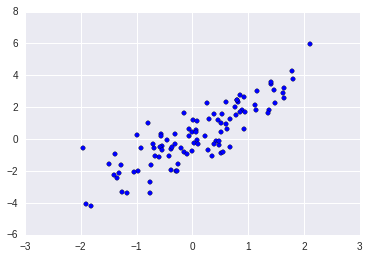

In [282]:
plt.scatter(X[:, 0], X[:, 1]);

Let’s use fancy indexing to select 20 random points. We’ll do this by first choosing 20
random indices with no repeats, and use these indices to select a portion of the origi‐
nal array:

In [283]:
indices = np.random.choice(X.shape[0], 20, replace=False)
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

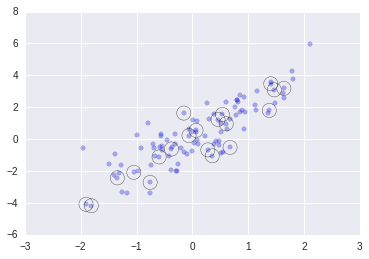

In [285]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

### Modifying values with Fancy Indexing
Above we saw how to access parts of an array with fancy indexing. Fancy indexing
can also be used to modify parts of an array.
For example, imagine we have an array of indices and we’d like to set the corresponding items in an array to some value:

In [286]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [287]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause some poten‐
tially unexpected results. Consider the following:

In [292]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Where did the 4 go? The result of this operation is to first assign x[0] = 4 , followed by x[0] = 6 . The result, of course, is that x[0] contains the value 6.
Fair enough, but consider this operation:

In [293]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

You might expect that x[3] would contain the value 2, and x[3] would contain the
value 3, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because x[i] += 1 is meant as a short-hand of x[i] = x[i] +
1 . x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this
in mind, it is not the augmentation that happens multuple times, but the assignment,
which leads to the rather non-intuitive results.
So what if you want the other behavior where the operation is repeated? For this, you
can use the at() method of ufuncs (available since NumPy 1.8), and do the following:

In [294]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


The at() method does an in-place application of the given operator at the specified
indices (here, i ) with the specified value (here, 1). Another method which is similar
in spirit is the reduceat() method of ufuncs, which you can read about in the
NumPy documentation.

##Sorting Arrays
This section covers algorithms related to sorting NumPy arrays. These algorithms are
a favorite topic in introductory computer science courses: if you’ve ever taken one,
you probably have had dreams (or, depending on your temperment, nightmares)
about insertion sorts, selection sorts, merge sorts, quick sorts, bubble sorts, and many,
many more. All are means of accomplishing a similar task: sorting the values in a list
or array.
For example, a simple selection sort repeatedly finds the minimum value from a list,
and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [3]:
def selection_sort(L):
    for i in range(len(L)):
        swap = i + np.argmin(L[i:])
        (L[i], L[swap]) = (L[swap], L[i])
    return L

In [4]:
L = np.array([2, 1, 4, 3, 5])
selection_sort(L)

array([1, 2, 3, 4, 5])

Even selection sort, though, is much better than my all-time favorite sorting algorithms, the bogosort:

In [5]:
def bogosort(L):
    while np.any(L[:-1] > L[1:]):
        np.random.shuffle(L)
    return L

In [6]:
L = np.array([2, 1, 4, 3, 5])
bogosort(L)

array([1, 2, 3, 4, 5])

This silly sorting method relies on pure chance: it shuffles the array repeatedly until the result happens to be sorted

### Fast Sorts in Python

In [7]:
L = [2, 1, 4, 3, 5]
sorted(L)

[1, 2, 3, 4, 5]

In [8]:
print(L)

[2, 1, 4, 3, 5]


In [9]:
L.sort()
print(L)

[1, 2, 3, 4, 5]


### Fast Sorts in NumPy: np.sort and np.argsort

In [10]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [11]:
x.sort()
print(x)

[1 2 3 4 5]


In [14]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [16]:
x[i]

array([1, 2, 3, 4, 5])

Sorting Along Rows or Columns
A useful feature of NumPy’s sorting algorithms is the ability to sort along specific
rows or columns of a multi-dimensional array using the axis argument. With it, we
can sort along rows or columns of a two-dimensional array:

In [17]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [18]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [23]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### Partial Sorts: Partitioning
Sometimes we don’t care about sorting the entire array, but simply care about finding
the N smallest values in the array. NumPy provides this in the np.partition func‐
tion. np.partition takes an array and a number K ; the result is a new array with the
smallest K values to the left of the partition, and the remaining values to the right, in
arbitrary order:

In [29]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 4)

array([2, 1, 3, 4, 5, 6, 7])

##Searching and Counting Values In Arrays
This section covers ways of finding a particular value or particular values in an array
of data. This may sound like it simply requires a linear scan of the data, but when you
know the data is sorted, or if you’re trying to find multiple values at the same time,
there are faster ways to go about it.
###Python Standard Library Tools
Because this is so important, the Python standard library has a couple solutions you
should be aware of. Here we’ll quickly go over the functions and methods Python
contains for doing searches in unsorted and sorted lists, before continuing on to the
more specialized tools in NumPy.
####Unsorted Lists

In [30]:
L = [5, 2, 6, 1, 3, 6]
L.index(6)

2

#### Sorted Lists

In [38]:
import bisect
L = [2, 4, 5, 5, 7, 9]
bisect.bisect_left(L, 5)

2

Technically, bisect is not searching for the value itself, but for the insertion index:
that is, the index at which the value should be inserted in order to keep the list sorted:

In [36]:
bisect.bisect(L, 4.5)

2

In [ ]:
L.insert(2, 4.5)
L == sorted(L)

###Searching for Values in NumPy Arrays
NumPy has some similar tools and patterns which work for quickly locating values in
arrays, but their use is a bit different than the Python standard library approaches.
The patterns listed below have the benefit of operating much more quickly on
NumPy arrays, and of scaling well as the size of the array grows.
####Unsorted Arrays

In [45]:
A = np.array([5, 2, 6, 1, 3, 6])
where = np.where(A < 2)
print where

(array([3]),)


np.where always returns a tuple of index arrays; even in the case of a one-dimensional
array you should remember that the output is a one-dimensional tuple. To isolate the
first index at which the value is found, then, you must use [0] to access the first item
of the tuple, and [0] again to access the first item of the array of indices. This gives
the equivalent result to list.index :

In [41]:
list(A).index(6) == np.where(A == 6)[0][0]

True

Note that this masking approach solves a different use-case than list.index : rather
than finding the first occurrance of the value and stopping, it finds all occurrances of
the value simultaneously.

####Sorted Arrays
If your array is sorted, NumPy provides a fast equivalent of Python’s bisect utilities
with the np.searchsorted function:

In [46]:
A = np.array([2, 4, 5, 5, 7, 9])
np.searchsorted(A, 7)

4

In [47]:
np.searchsorted(A, 4.5)

2

In [51]:
np.searchsorted(A, [7, 4.5, 5, 10, 0])

array([4, 2, 2, 6, 0])

###Counting and Binning
A related set of functionality in NumPy is the built-in tools for counting and binning
of values. For example, to count the occurrances of a value or other condition in an
array, use np.count_nonzero :

In [56]:
A = np.array([2, 0, 2, 3, 4, 3, 4, 3])
np.count_nonzero(A == 2)

2

In [58]:
np.unique(A, return_counts=True)

array([0, 2, 3, 4])

If your data consist of positive integers, a more compact way to get
this information is with the np.bincount function:

In [60]:
np.bincount(A)

array([1, 0, 2, 3, 2])

np.bincount can become cumbersome when your values are large,
and it does not apply when your values are not integers. For this more general case,
you can specify bins for your values with the np.histogram function:

In [66]:
counts, bins = np.histogram(A, bins=range(6))
print("bins:       ", bins)
print("counts in bin: ", counts)

('bins:       ', array([0, 1, 2, 3, 4, 5]))
('counts in bin: ', array([1, 0, 2, 3, 2]))


Here the output is formatted to make clear that the bins give the boundaries of the
range, and the counts indicate how many values fall within each of those ranges. For
this reason, the counts array will have one fewer entry than the bins array. A related
function to be aware of is np.digitize , which quickly computes index of the appro‐
priate bin for a series of values.

## Structured Data: NumPy’s Structured Arrays
While often our data can be well-represented by a homogeneous array of values,
sometimes this is not the case. This section demonstrates the use of NumPy’s struc‐
tured arrays and record arrays, which provide efficient storage for compound, hetero‐
geneous data. While the patterns shown here are useful for simple operations,
scenarios like this often lend themselves to the use of Pandas Dataframes, which we’ll
explore in the next chapter.
Imagine that we have several categories of data on a number of people (say, name,
age, and weight), and we’d like to store these values for use in a Python program. It
would be possible to store these in three separate arrays:

In [67]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

But this is a bit clumsy. There’s nothing here that tells us that the three arrays are
related; it would be more natural if we could use a single structure to store all of this
data. NumPy can handle this through structured arrays, which are arrays with com‐
pound data types.

Recall that previously we created a simple array using an expression like this:

In [68]:
x = np.zeros(4, dtype=int)

We can similarly create a structured array using a compound data type specification:

In [70]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)
print data

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]
[(u'', 0, 0.0) (u'', 0, 0.0) (u'', 0, 0.0) (u'', 0, 0.0)]


Here 'U10' translates to “unicode string of maximum length 10”, 'i4' translates to
“4-byte (i.e. 32 bit) integer” and 'f8' translates to “8-byte (i.e. 64 bit) float)”. We’ll
discuss other options for these type codes below.

Now that we’ve created an empty container array, we can fill the array with our lists of
values:

In [72]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print data

[(u'Alice', 25, 55.0) (u'Bob', 45, 85.5) (u'Cathy', 37, 68.0)
 (u'Doug', 19, 61.5)]


As we had hoped, the data is now arranged together in one convenient block of memory.

The handy thing with structured arrays is that you can now refer to values either by
index or by name:

In [73]:
# Get all names
data['name']

array([u'Alice', u'Bob', u'Cathy', u'Doug'], 
      dtype='<U10')

In [74]:
# Get first row of data
data[0]

(u'Alice', 25, 55.0)

In [75]:
# Get the name from the last row
data[-1]['name']

u'Doug'

In [76]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array([u'Alice', u'Doug'], 
      dtype='<U10')

### Creating Structured Arrays
Structured array data types can be specified in a number of ways. Above, we saw the
dictionary method:

In [77]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [78]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

dtype([('name', 'S10'), ('age', '<i8'), ('weight', '<f4')])

In [79]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

### More Advanced Compound Types
It is possible to define even more advanced compound types. For example, you can
create a type where each element contains an array or matrix of values. Here, we’ll
create a data type with a mat component consisting of a 3x3 floating point matrix:

In [89]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
#print X
print(X[0])
print(X["id"])

(0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
[0]


### RecordArrays: Structured Arrays with a Twist
NumPy also provides the np.recarray class, which is almost identical to the struc‐
tured arrays described above with one additional feature: fields can be accessed as
attributes rather than as dictionary keys. Recall that we previously accessed the ages
by writing:

In [90]:
data['age']

array([25, 45, 37, 19], dtype=int32)

If we view our data as a record array instead, we can access this with slightly fewer
keystrokes:

In [97]:
data_rec = data.view(np.recarray)
data_rec.age
data_rec.name

chararray([u'Alice', u'Bob', u'Cathy', u'Doug'], 
      dtype='<U10')

The downside is that for record arrays, there is some extra overhead involved in
accessing the fields, even when using the same syntax. We can see this here:

In [92]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

The slowest run took 18.92 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 265 ns per loop
100000 loops, best of 3: 5.56 µs per loop
100000 loops, best of 3: 10.7 µs per loop
